# Thoraric Surgery


<div class="alert alert-block alert-info">
Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

# Data quality analysis:

<div class="alert alert-block alert-success">
 
Missing values

Extremes

Distribution of each variable

Value transformation (missing values, extremes)

Comments with conclusions

In [269]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib as plt
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import os
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from warnings import filterwarnings
filterwarnings('ignore')

from matplotlib import rcParams

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

from sklearn.svm import SVC, LinearSVC
from sklearn import svm

from scipy.stats import zscore, norm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve

In [270]:
surgery= pd.read_csv('csv_result-ThoraricSurgery.csv')

In [271]:
surgery.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [272]:
surgery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 40.5+ KB


<div class="alert alert-block alert-success">
<b><i>Missing values

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

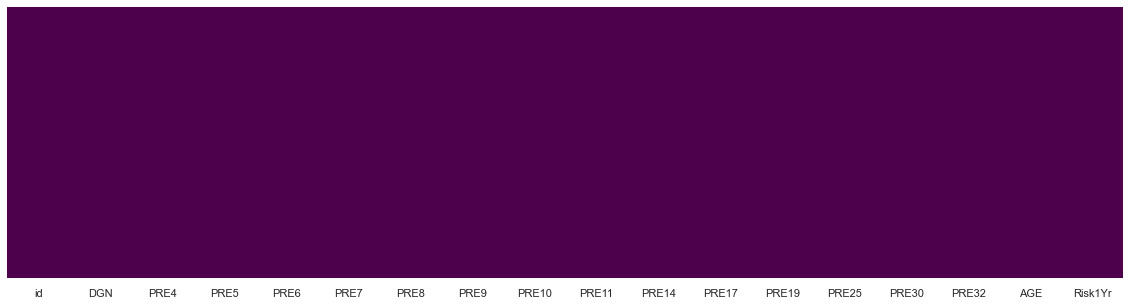

In [273]:
plt.figure(figsize=(20,5))
pltlot_MV=sns.heatmap(surgery.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')
surgery.isnull().sum()

<div class="alert alert-block alert-info">
Predmetni dataset nema MV (missing values)

In [274]:
surgery.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [275]:
surgery.describe(include=['object', 'bool'])

,DGN,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,Risk1Yr
count,470,470,470,470,470,470,470,470,470,470,470,470,470,470
unique,7,3,2,2,2,2,2,4,2,2,2,2,2,2
top,DGN3,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,F
freq,349,313,439,402,439,323,392,257,435,468,462,386,468,400


<div class="alert alert-block alert-info">
Kontinuirani podaci su u atributima 'id', 'PRE4', 'PRE5' i 'AGE'. Atribut 'id' ćemo izbaciti jer nam nije potreban u daljnjoj analizi, a ostale kontinuirane podatke u navedenim atributima potrebno je grupirati  u svrhu kreiranja dummy varijable. 
Ostale atribute potrebno je transformirati u binarne (0,1)

Radi lakšeg snalaženja i boljeg raumijevanja većinu atributa ću preimenovati sukladno infromacijama koje imamo o njima.

In [276]:
surgery2=surgery.drop(['id'], axis=1)

In [277]:
surgery2.columns

Index(['DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11',
       'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE', 'Risk1Yr'],
      dtype='object')

In [278]:
col = ['Diagnosis','FVC','FEV1','Performance','Pain','Haemoptysis','Dyspnoea',
       'Cough','Weakness','Tumor_Size','Diabetes','MI_6mo','PAD','Smoking','Asthma','Age','Death_1yr']
surgery2.columns = col

In [279]:
surgery2.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [280]:
surgery2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Diagnosis    470 non-null    object 
 1   FVC          470 non-null    float64
 2   FEV1         470 non-null    float64
 3   Performance  470 non-null    object 
 4   Pain         470 non-null    object 
 5   Haemoptysis  470 non-null    object 
 6   Dyspnoea     470 non-null    object 
 7   Cough        470 non-null    object 
 8   Weakness     470 non-null    object 
 9   Tumor_Size   470 non-null    object 
 10  Diabetes     470 non-null    object 
 11  MI_6mo       470 non-null    object 
 12  PAD          470 non-null    object 
 13  Smoking      470 non-null    object 
 14  Asthma       470 non-null    object 
 15  Age          470 non-null    int64  
 16  Death_1yr    470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 36.8+ KB


<div class="alert alert-block alert-info">
<b><i>Slijedi provjera ouliera.

In [281]:
def z_values(data):
    values = []
    for col in data.columns:
        values.append({
            'Column': col,
            'Max Z-Val': round(np.abs(max(zscore(data[col].dropna()))), 2)
        })
    
    z = pd.DataFrame(values)
    return z

In [282]:
z_col = ['Age', 'FVC', 'FEV1']

In [283]:
z_values = z_values(data=surgery2[z_col])

In [284]:
z_values

,Column,Max Z-Val
0,Age,2.81
1,FVC,3.47
2,FEV1,6.95


In [285]:
z = np.abs(zscore(surgery2[surgery2[z_col].columns].dropna()))
print((z > 3).sum())

17


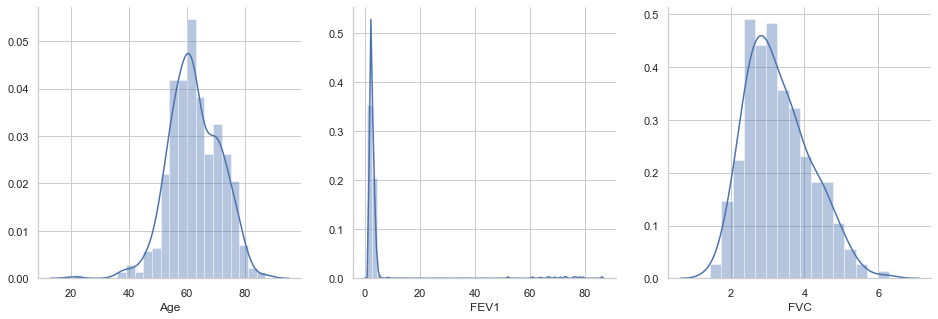

In [286]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(surgery2['Age'])
plt.subplot(1,3,2)
sns.distplot(surgery2['FEV1'])
plt.subplot(1,3,3)
sns.distplot(surgery2['FVC'])
plt.show()

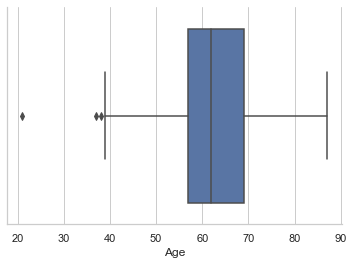

In [287]:
sns.boxplot(surgery2['Age'])

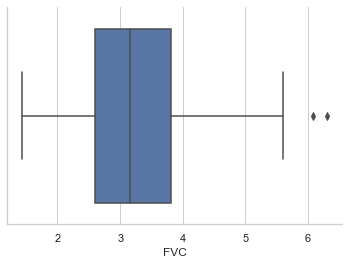

In [288]:
sns.boxplot(surgery2['FVC'])

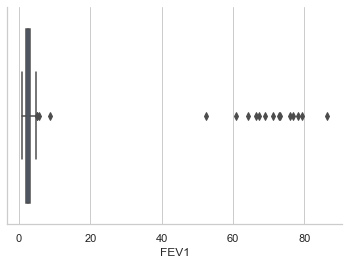

In [289]:
sns.boxplot(surgery2['FEV1'])

<div class="alert alert-block alert-info">
Sva tri atributa s kontinuiranim podacima (Age, FEV1 i FVC) imaju outliere, odnosno ekstreme koje je potrebno utvrditi gdje se točno nalaze i odlučiti što s njima učiniti

In [290]:
print("Highest allowed",surgery2['Age'].mean() + 3*surgery2['Age'].std())
print("Lowest allowed",surgery2['Age'].mean() - 3*surgery2['Age'].std())

Highest allowed 88.65474800804377
Lowest allowed 36.41333709833921


In [291]:
surgery2[(surgery2['Age'] > 88.65) | (surgery2['Age'] < 36.41)]

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
396,DGN3,2.76,2.08,PRZ0,F,F,F,F,F,OC12,F,F,F,F,F,21,F


In [292]:
surgery3 = surgery2[(surgery2['Age'] < 88.65) & (surgery2['Age'] > 36.41)]
surgery3

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [293]:
print("Highest allowed",surgery3['FVC'].mean() + 3*surgery3['FVC'].std())
print("Lowest allowed",surgery3['FVC'].mean() - 3*surgery3['FVC'].std())

Highest allowed 5.898724950018334
Lowest allowed 0.6667761160797503


In [294]:
surgery3[(surgery3['FVC'] > 5.89) | (surgery3['FVC'] < 0.66)]

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
73,DGN4,6.30,5.48,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,45,F
93,DGN3,6.08,4.92,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,50,F


In [295]:
surgery4 = surgery3[(surgery3['FVC'] < 5.89) & (surgery3['FVC'] > 0.66)]
surgery4

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [296]:
print("Highest allowed",surgery4['FEV1'].mean() + 3*surgery4['FEV1'].std())
print("Lowest allowed",surgery4['FEV1'].mean() - 3*surgery4['FEV1'].std())

Highest allowed 39.986405041737605
Lowest allowed -30.843749795484932


In [297]:
surgery4[(surgery4['FEV1'] > 39.98) | (surgery4['FEV1'] < -30.84)]

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
25,DGN5,4.56,72.8,PRZ0,T,T,F,T,F,OC12,F,F,F,T,F,57,F
89,DGN3,2.83,66.4,PRZ1,T,T,T,T,F,OC12,F,F,F,T,F,75,F
98,DGN3,2.63,67.3,PRZ1,F,F,T,T,F,OC11,F,F,F,T,F,54,F
112,DGN3,3.68,64.1,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,60,F
132,DGN2,2.50,71.1,PRZ0,F,F,T,F,F,OC13,F,F,F,T,F,64,T
255,DGN3,3.72,78.3,PRZ0,T,F,F,T,F,OC12,F,F,F,T,F,44,F
319,DGN3,2.10,69.1,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,62,F
325,DGN4,5.03,79.3,PRZ1,F,F,T,F,F,OC11,F,F,F,F,F,38,F
330,DGN2,2.94,76.0,PRZ1,F,T,T,T,F,OC12,F,F,F,F,F,61,F
349,DGN4,1.82,86.3,PRZ0,F,F,F,F,F,OC12,F,F,F,F,F,67,F


In [298]:
surgery5 = surgery4[(surgery4['FEV1'] < 39.98) & (surgery4['FEV1'] > -30.84)]
surgery5

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


<div class="alert alert-block alert-success">
Ukupno je bilo 17 ouliera i svi su uklonjeni iz dataseta, kako ne bi negativno utjecali na prediktivni model. Slijedi prikaz distribucije nakon uklanjanja ouliera.

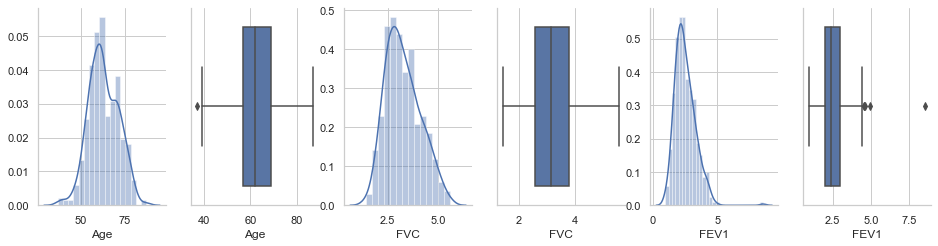

In [299]:
plt.figure(figsize=(16,8))
plt.subplot(2,6,1)
sns.distplot(surgery5['Age'])
plt.subplot(2,6,2)
sns.boxplot(surgery5['Age'])
plt.subplot(2,6,3)
sns.distplot(surgery5['FVC'])
plt.subplot(2,6,4)
sns.boxplot(surgery5['FVC'])
plt.subplot(2,6,5)
sns.distplot(surgery5['FEV1'])
plt.subplot(2,6,6)
sns.boxplot(surgery5['FEV1'])
plt.show()

<div class="alert alert-block alert-success">
<b><i>Distribucija ostalih atributa

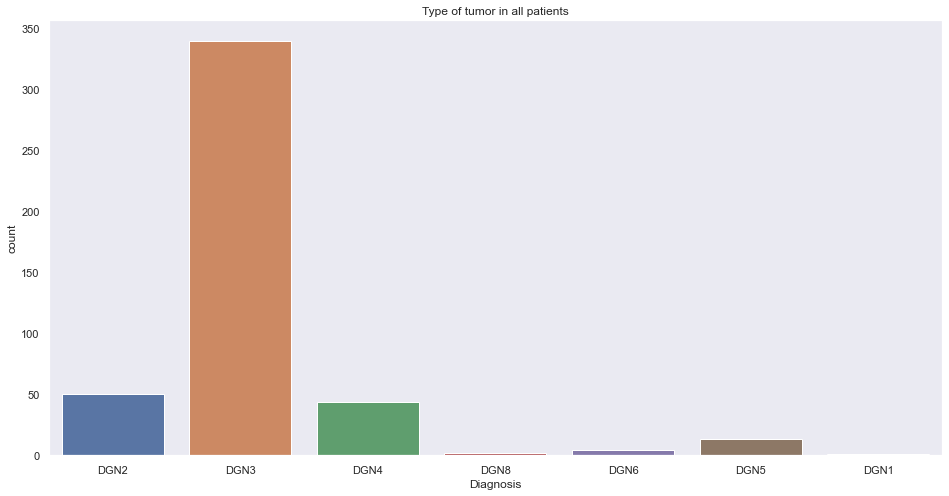

In [300]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Type of tumor in all patients")

sns.set(font_scale=1)
sns.countplot(x='Diagnosis', data=surgery5)

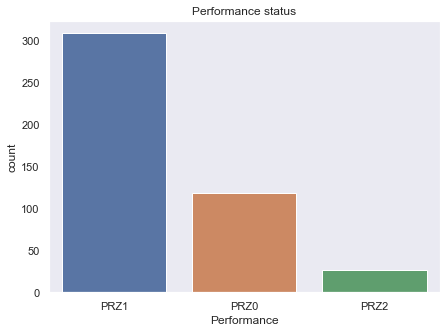

In [301]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Performance status")

sns.set(font_scale=1)
sns.countplot(x='Performance', data=surgery5)

In [302]:
surgery5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 469
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Diagnosis    453 non-null    object 
 1   FVC          453 non-null    float64
 2   FEV1         453 non-null    float64
 3   Performance  453 non-null    object 
 4   Pain         453 non-null    object 
 5   Haemoptysis  453 non-null    object 
 6   Dyspnoea     453 non-null    object 
 7   Cough        453 non-null    object 
 8   Weakness     453 non-null    object 
 9   Tumor_Size   453 non-null    object 
 10  Diabetes     453 non-null    object 
 11  MI_6mo       453 non-null    object 
 12  PAD          453 non-null    object 
 13  Smoking      453 non-null    object 
 14  Asthma       453 non-null    object 
 15  Age          453 non-null    int64  
 16  Death_1yr    453 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 54.9+ KB


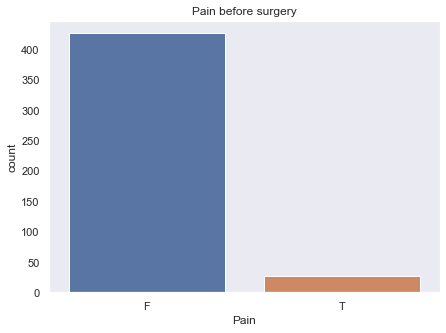

In [303]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Pain before surgery")

sns.set(font_scale=1)
sns.countplot(x='Pain', data=surgery5)

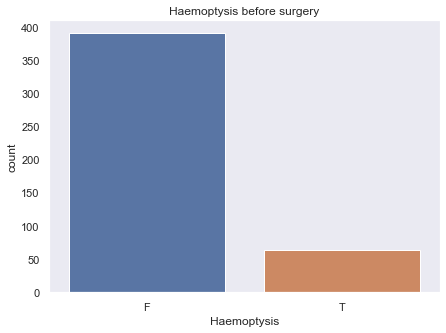

In [304]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Haemoptysis before surgery")

sns.set(font_scale=1)
sns.countplot(x='Haemoptysis', data=surgery5)

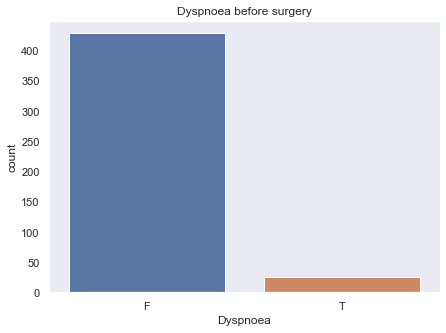

In [305]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Dyspnoea before surgery")

sns.set(font_scale=1)
sns.countplot(x='Dyspnoea', data=surgery5)

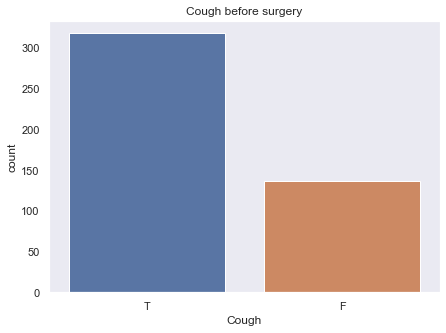

In [306]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Cough before surgery")

sns.set(font_scale=1)
sns.countplot(x='Cough', data=surgery5)

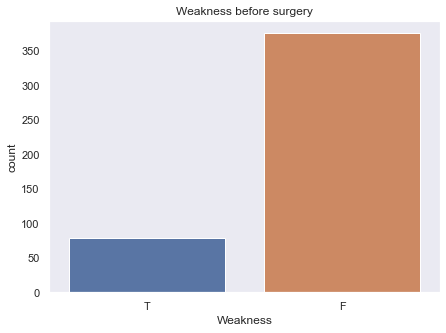

In [307]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Weakness before surgery")

sns.set(font_scale=1)
sns.countplot(x='Weakness', data=surgery5)

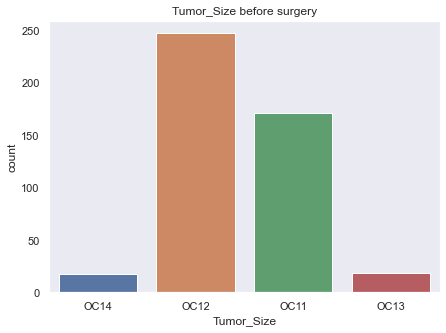

In [308]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Tumor_Size before surgery")

sns.set(font_scale=1)
sns.countplot(x='Tumor_Size', data=surgery5)

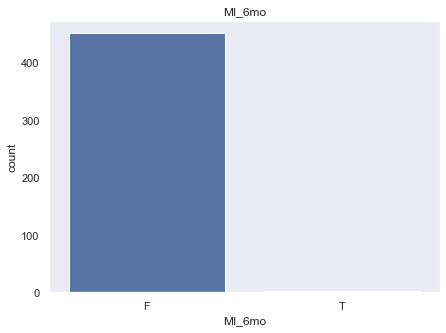

In [309]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("MI_6mo")

sns.set(font_scale=1)
sns.countplot(x='MI_6mo', data=surgery5)

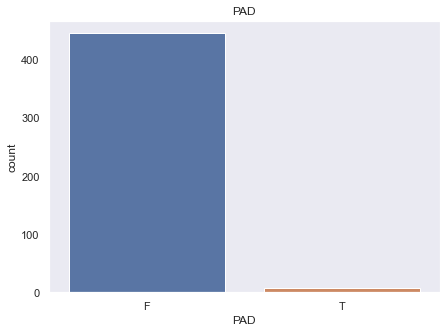

In [310]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("PAD")

sns.set(font_scale=1)
sns.countplot(x='PAD', data=surgery5)

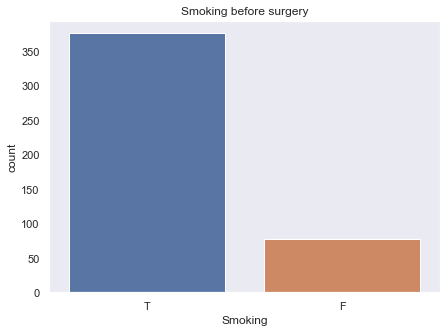

In [311]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Smoking before surgery")

sns.set(font_scale=1)
sns.countplot(x='Smoking', data=surgery5)

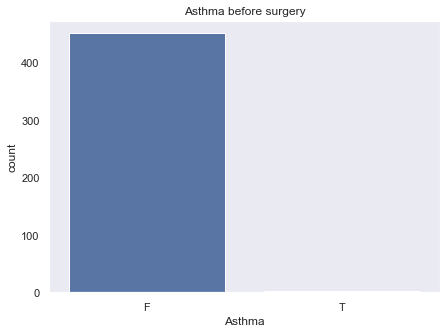

In [312]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Asthma before surgery")

sns.set(font_scale=1)
sns.countplot(x='Asthma', data=surgery5)

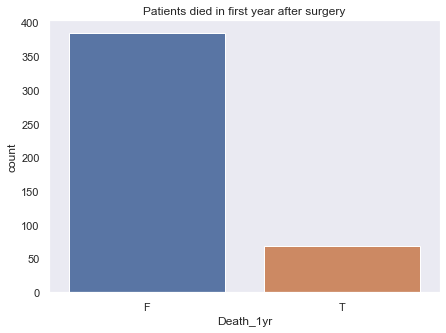

In [313]:
sns.set_style(style="dark")
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title("Patients died in first year after surgery")

sns.set(font_scale=1)
sns.countplot(x='Death_1yr', data=surgery5)

In [314]:
surgery5.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [315]:
surgery5.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [316]:

replacing = {'DGN1':1, 'DGN2':2, 'DGN3':3, 'DGN4':4, 'DGN5':5, 'DGN6':6, 'DGN8':8,
             'PRZ0':0, 'PRZ1':1, 'PRZ2':2,
             'OC11':1, 'OC12':2, 'OC13':3, 'OC14':4,
             'F':0, 'T':1
             }

surgery5.replace(replacing, inplace=True)


In [317]:
surgery5.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [318]:
surgery5['Diagnosis'] = surgery5['Diagnosis'].astype('float')
surgery5['Performance'] = surgery5['Performance'].astype('float')
surgery5['Pain'] = surgery5['Pain'].astype('float')
surgery5['Haemoptysis'] = surgery5['Haemoptysis'].astype('float')
surgery5['Dyspnoea'] = surgery5['Dyspnoea'].astype('float')
surgery5['Weakness'] = surgery5['Weakness'].astype('float')
surgery5['Cough'] = surgery5['Cough'].astype('float')
surgery5['Tumor_Size'] = surgery5['Tumor_Size'].astype('float')
surgery5['Diabetes'] = surgery5['Diabetes'].astype('float')
surgery5['PAD'] = surgery5['PAD'].astype('float')
surgery5['Smoking'] = surgery5['Smoking'].astype('float')
surgery5['Asthma'] = surgery5['Asthma'].astype('float')
surgery5['Death_1yr'] = surgery5['Death_1yr'].astype('float')


In [319]:
surgery5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 469
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Diagnosis    453 non-null    float64
 1   FVC          453 non-null    float64
 2   FEV1         453 non-null    float64
 3   Performance  453 non-null    float64
 4   Pain         453 non-null    float64
 5   Haemoptysis  453 non-null    float64
 6   Dyspnoea     453 non-null    float64
 7   Cough        453 non-null    float64
 8   Weakness     453 non-null    float64
 9   Tumor_Size   453 non-null    float64
 10  Diabetes     453 non-null    float64
 11  MI_6mo       453 non-null    int64  
 12  PAD          453 non-null    float64
 13  Smoking      453 non-null    float64
 14  Asthma       453 non-null    float64
 15  Age          453 non-null    int64  
 16  Death_1yr    453 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 79.7 KB


<div class="alert alert-block alert-success">
Dataset je očišćen. Outlieri uklonjeni iz kontinuiranih podataka, a nedostajućih vrijednosti nije bilo. Svi atributi su sada int64 i float64. 

# Univariant analysis:

<div class="alert alert-block alert-info">

WoE, IV for each variable

Selection of most predictive variables

Coarse classing – grouping by WoE

Story telling – problem description


<div class="alert alert-block alert-success">
Prije određivanja WoE i IV potrebno je dodatno pripremiti podatke. Odnosno, potrebno je grupirati kontinuirane podatke, te dodati nove kolone za atribute 'Age', 'Diagnosis', 'FVC', 'FEV1', 'Performance' i 'Tumor_Size'

<div class="alert alert-block alert-success">
'Age' 

minimalna dob pacijenata je 37, a maksimalna 87 godina starosti. Kreirat ću interval od 30 do 90 godina starosti, uz intervale od 5 godina




In [320]:
age_range = pd.interval_range(start=30, freq=5, end=90)

In [321]:
surgery5['Age_g'] = pd.cut(surgery5['Age'], bins=age_range)

In [322]:
surgery5.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr,Age_g
0,2.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0,0.0,1.0,0.0,60,0.0,"(55, 60]"
1,3.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,1.0,0.0,51,0.0,"(50, 55]"
2,3.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,1.0,0.0,59,0.0,"(55, 60]"
3,3.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,54,0.0,"(50, 55]"
4,3.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,1.0,0.0,73,1.0,"(70, 75]"


<div class="alert alert-block alert-success">
Za atribute 'FVC' i 'FEV1' kreirat ću intervale prema kvantilima (0, 0.2, 0.4, 0.6, 0.8 i 1.0)

In [323]:
q = [0, .2, .4, .6, .8, 1]

In [324]:
surgery5['FVC_q'] = pd.qcut(surgery5['FVC'], q=q)

In [325]:
surgery5['FEV1_q'] = pd.qcut(surgery5['FEV1'], q=q)

In [326]:
surgery5.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr,Age_g,FVC_q,FEV1_q
0,2.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0,0.0,1.0,0.0,60,0.0,"(55, 60]","(2.508, 2.952]","(1.88, 2.2]"
1,3.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,1.0,0.0,51,0.0,"(50, 55]","(2.952, 3.4]","(0.959, 1.88]"
2,3.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,1.0,0.0,59,0.0,"(55, 60]","(2.508, 2.952]","(1.88, 2.2]"
3,3.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,54,0.0,"(50, 55]","(3.4, 4.04]","(2.6, 3.12]"
4,3.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,1.0,0.0,73,1.0,"(70, 75]","(1.439, 2.508]","(0.959, 1.88]"


In [327]:
col_drop = ['Age', 'FVC', 'FEV1']
surgery5.drop(columns=col_drop, axis=1, inplace=True)

In [328]:
surgery5.head()

,Diagnosis,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes,MI_6mo,PAD,Smoking,Asthma,Death_1yr,Age_g,FVC_q,FEV1_q
0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0,0.0,1.0,0.0,0.0,"(55, 60]","(2.508, 2.952]","(1.88, 2.2]"
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0,0.0,1.0,0.0,0.0,"(50, 55]","(2.952, 3.4]","(0.959, 1.88]"
2,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0,1.0,0.0,0.0,"(55, 60]","(2.508, 2.952]","(1.88, 2.2]"
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,0.0,"(50, 55]","(3.4, 4.04]","(2.6, 3.12]"
4,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,1.0,0.0,1.0,"(70, 75]","(1.439, 2.508]","(0.959, 1.88]"


<div class="alert alert-block alert-success">

**Weight of Evidence**
$$ \ WoE = [ln(\frac{\text{Relative frequency of Goods}}{\text{Relative frequency of Bads}})] * 100 $$

**Information Value**
$$ \ IV = \sum(DistributionGood_{i} - DistributionBad_{i}) * WoE_{i} $$

</div>


In [329]:
surgery6=surgery5.copy()

In [330]:
def calculate_woe_iv(data, feature, target, sort_feat=None):
    lst = []
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': data[data[feature] == val].count()[feature],
            'Good': data[(data[feature] == val) & (data[target] == 0)].count()[feature],
            'Bad': data[(data[feature] == val) & (data[target] == 1)].count()[feature]
        })
        
    report = pd.DataFrame(lst)
    report['Distr_Good'] = report['Good'] / report['Good'].sum()
    report['Distr_Bad'] = report['Bad'] / report['Bad'].sum()
    report['WoE'] = np.log(report['Distr_Good'] / report['Distr_Bad'])
    report = report.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    report['IV'] = (report['Distr_Good'] - report['Distr_Bad']) * report['WoE']
    iv = report['IV'].sum()
    
    if sort_feat == None:
        report = report.sort_values(by='WoE')
        return report, iv
    else:
        report = report.sort_values(by=sort_feat)
        return report, iv

In [331]:
print('WoE and IV for column: {}'.format('Diagnosis'))
df_diagnosis, iv_diagnosis = calculate_woe_iv(data=surgery6, feature='Diagnosis', target='Death_1yr')
display(df_diagnosis)
print('IV score: {:.2f}'.format(iv_diagnosis))
#medium

WoE and IV for column: Diagnosis


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
5,5.0,13,6,7,0.015625,0.101449,-1.870687,0.160550
3,8.0,2,1,1,0.002604,0.014493,-1.716536,0.020407
0,2.0,50,39,11,0.101562,0.159420,-0.450870,0.026086
2,4.0,44,37,7,0.096354,0.101449,-0.051528,0.000263
4,6.0,4,4,0,0.010417,0.000000,0.000000,0.000000
6,1.0,1,1,0,0.002604,0.000000,0.000000,0.000000
1,3.0,339,296,43,0.770833,0.623188,0.212623,0.031393


IV score: 0.24


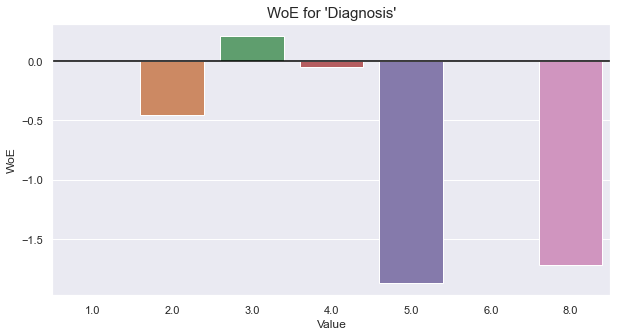

In [332]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_diagnosis, x='Value' , y='WoE')
plt.axhline(0, c='black')
plt.title('WoE for \'Diagnosis\'', size=15)
plt.show()

In [333]:
#grupiranje
surgery6['Age_g'].replace({'(1.0]':'(1.0]', 
                       '(6.0]':'(1.0]'}, inplace=True)

In [334]:
print('WoE and IV for column: {}'.format('Performance'))
df_performance, iv_performance = calculate_woe_iv(data=surgery6, feature='Performance', target='Death_1yr')
display(df_performance)
print('IV score: {:.2f}'.format(iv_performance))
# slab, mičemo iz dataseta

WoE and IV for column: Performance


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
2,2.0,27,20,7,0.052083,0.101449,-0.666714,0.032913
0,1.0,308,259,49,0.674479,0.710145,-0.051528,0.001838
1,0.0,118,105,13,0.273438,0.188406,0.372475,0.031672


IV score: 0.07


In [335]:
surgery6.drop(columns='Performance', axis=1, inplace=True)

In [336]:
print('WoE and IV for column: {}'.format('Pain'))
df_pain, iv_pain = calculate_woe_iv(data=surgery6, feature='Pain', target='Death_1yr')
display(df_pain)
print('IV score: {:.2f}'.format(iv_pain))
# slab, mičemo iz dataseta

WoE and IV for column: Pain


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,27,20,7,0.052083,0.101449,-0.666714,0.032913
0,0.0,426,364,62,0.947917,0.898551,0.053483,0.002640


IV score: 0.04


In [337]:
surgery6.drop(columns='Pain', axis=1, inplace=True)

In [338]:
print('WoE and IV for column: {}'.format('Haemoptysis'))
df_haemoptysis, iv_haemoptysis = calculate_woe_iv(data=surgery6, feature='Haemoptysis', target='Death_1yr')
display(df_haemoptysis)
print('IV score: {:.2f}'.format(iv_haemoptysis))
# slab, mičemo iz dataseta

WoE and IV for column: Haemoptysis


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,63,49,14,0.127604,0.202899,-0.463773,0.034920
0,0.0,390,335,55,0.872396,0.797101,0.090261,0.006796


IV score: 0.04


In [339]:
surgery6.drop(columns='Haemoptysis', axis=1, inplace=True)

In [340]:
print('WoE and IV for column: {}'.format('Dyspnoea'))
df_dyspnoea, iv_dyspnoea = calculate_woe_iv(data=surgery6, feature='Dyspnoea', target='Death_1yr')
display(df_dyspnoea)
print('IV score: {:.2f}'.format(iv_dyspnoea))
# slab, mičemo iz dataseta

WoE and IV for column: Dyspnoea


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,25,17,8,0.044271,0.115942,-0.962764,0.069002
0,0.0,428,367,61,0.955729,0.884058,0.077952,0.005587


IV score: 0.07


In [341]:
surgery6.drop(columns='Dyspnoea', axis=1, inplace=True)

In [342]:
print('WoE and IV for column: {}'.format('Cough'))
df_cough, iv_cough = calculate_woe_iv(data=surgery6, feature='Cough', target='Death_1yr')
display(df_cough)
print('IV score: {:.2f}'.format(iv_cough))
# slab, mičemo iz dataseta

WoE and IV for column: Cough


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,317,262,55,0.682292,0.797101,-0.155525,0.017856
1,0.0,136,122,14,0.317708,0.202899,0.448428,0.051484


IV score: 0.07


In [343]:
surgery6.drop(columns='Cough', axis=1, inplace=True)

In [344]:
print('WoE and IV for column: {}'.format('Weakness'))
df_weakness, iv_weakness = calculate_woe_iv(data=surgery6, feature='Weakness', target='Death_1yr')
display(df_weakness)
print('IV score: {:.2f}'.format(iv_weakness))
# slab, mičemo iz dataseta

WoE and IV for column: Weakness


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,78,61,17,0.158854,0.246377,-0.438876,0.038412
1,0.0,375,323,52,0.841146,0.753623,0.109873,0.009616


IV score: 0.05


In [345]:
surgery6.drop(columns='Weakness', axis=1, inplace=True)

In [346]:
print('WoE and IV for column: {}'.format('Tumor_Size'))
df_tumor_size, iv_tumor_size = calculate_woe_iv(data=surgery6, feature='Tumor_Size', target='Death_1yr')
display(df_tumor_size)
print('IV score: {:.2f}'.format(iv_tumor_size))
# srednji, ostaje u datasetu

WoE and IV for column: Tumor_Size


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,4.0,17,10,7,0.026042,0.101449,-1.359861,0.102544
3,3.0,18,13,5,0.033854,0.072464,-0.761025,0.029383
1,2.0,247,208,39,0.541667,0.565217,-0.042560,0.001002
2,1.0,171,153,18,0.398438,0.260870,0.423530,0.058264


IV score: 0.19


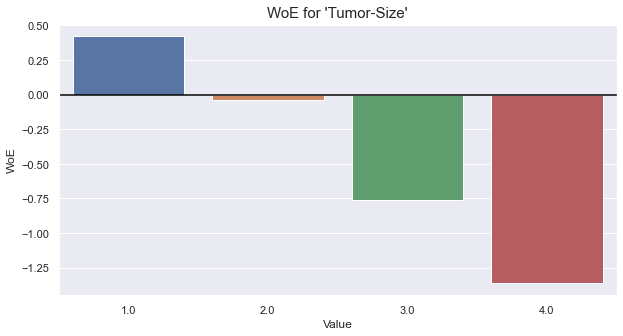

In [347]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_tumor_size, x='Value' , y='WoE')
plt.axhline(0, c='black')
plt.title('WoE for \'Tumor-Size\'', size=15)
plt.show()

In [348]:
print('WoE and IV for column: {}'.format('Diabetes'))
df_diabetes, iv_diabetes = calculate_woe_iv(data=surgery6, feature='Diabetes', target='Death_1yr')
display(df_diabetes)
print('IV score: {:.2f}'.format(iv_diabetes))
# slab, mičemo iz dataseta

WoE and IV for column: Diabetes


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,34,24,10,0.0625,0.144928,-0.841067,0.069327
0,0.0,419,360,59,0.9375,0.855072,0.092031,0.007586


IV score: 0.08


In [349]:
surgery6.drop(columns='Diabetes', axis=1, inplace=True)

In [350]:
print('WoE and IV for column: {}'.format('MI_6mo'))
df_mi6mo, iv_mi6mo = calculate_woe_iv(data=surgery6, feature='MI_6mo', target='Death_1yr')
display(df_mi6mo)
print('IV score: {:.2f}'.format(iv_mi6mo))
# slab, mičemo iz dataseta

WoE and IV for column: MI_6mo


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0,451,382,69,0.994792,1.0,-0.005222,0.000027
1,1,2,2,0,0.005208,0.0,0.000000,0.000000


IV score: 0.00


In [351]:
surgery6.drop(columns='MI_6mo', axis=1, inplace=True)

In [352]:
print('WoE and IV for column: {}'.format('PAD'))
df_pad, iv_pad = calculate_woe_iv(data=surgery6, feature='PAD', target='Death_1yr')
display(df_pad)
print('IV score: {:.2f}'.format(iv_pad))
# slab, mičemo iz dataseta

WoE and IV for column: PAD


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
1,1.0,8,6,2,0.015625,0.028986,-0.617924,0.008256
0,0.0,445,378,67,0.984375,0.971014,0.013666,0.000183


IV score: 0.01


In [353]:
surgery6.drop(columns='PAD', axis=1, inplace=True)

In [354]:
print('WoE and IV for column: {}'.format('Smoking'))
df_smoking, iv_smoking = calculate_woe_iv(data=surgery6, feature='Smoking', target='Death_1yr')
display(df_smoking)
print('IV score: {:.2f}'.format(iv_smoking))
# slab, mičemo iz dataseta

WoE and IV for column: Smoking


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,1.0,376,314,62,0.817708,0.898551,-0.094277,0.007622
1,0.0,77,70,7,0.182292,0.101449,0.586049,0.047378


IV score: 0.05


In [355]:
surgery6.drop(columns='Smoking', axis=1, inplace=True)

In [356]:
print('WoE and IV for column: {}'.format('Asthma'))
df_asthma, iv_asthma = calculate_woe_iv(data=surgery6, feature='Asthma', target='Death_1yr')
display(df_asthma)
print('IV score: {:.2f}'.format(iv_asthma))
# slab, mičemo iz dataseta

WoE and IV for column: Asthma


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,0.0,451,382,69,0.994792,1.0,-0.005222,0.000027
1,1.0,2,2,0,0.005208,0.0,0.000000,0.000000


IV score: 0.00


In [357]:
surgery6.drop(columns='Asthma', axis=1, inplace=True)

In [358]:
print('WoE and IV for column: {}'.format('Age_g'))
df_age_g, iv_age_g = calculate_woe_iv(data=surgery6, feature='Age_g', target='Death_1yr')
display(df_age_g)
print('IV score: {:.2f}'.format(iv_age_g))
# srednji, ostaje u datasetu

WoE and IV for column: Age_g


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
9,"(80, 85]",3,1,2,0.002604,0.028986,-2.409683,0.063571
8,"(85, 90]",2,1,1,0.002604,0.014493,-1.716536,0.020407
7,"(40, 45]",3,2,1,0.005208,0.014493,-1.023389,0.009502
6,"(35, 40]",4,3,1,0.007812,0.014493,-0.617924,0.004128
2,"(70, 75]",57,47,10,0.122396,0.144928,-0.168974,0.003807
1,"(50, 55]",66,55,11,0.143229,0.159420,-0.107098,0.001734
3,"(65, 70]",69,58,11,0.151042,0.159420,-0.053988,0.000452
0,"(55, 60]",104,88,16,0.229167,0.231884,-0.011788,0.000032
5,"(60, 65]",101,89,12,0.231771,0.173913,0.287194,0.016616
4,"(75, 80]",31,28,3,0.072917,0.043478,0.517056,0.015221


IV score: 0.15


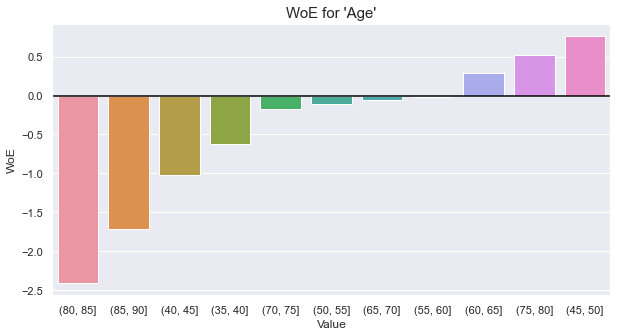

In [359]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_age_g, x='Value' , y='WoE')
plt.axhline(0, c='black')
plt.title('WoE for \'Age\'', size=15)
plt.show()

In [360]:
print('WoE and IV for column: {}'.format('FVC_q'))
df_fvc_q, iv_fvc_q = calculate_woe_iv(data=surgery6, feature='FVC_q', target='Death_1yr')
display(df_fvc_q)
print('IV score: {:.2f}'.format(iv_fvc_q))
# slab, mičemo iz dataseta

WoE and IV for column: FVC_q


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,"(2.508, 2.952]",90,71,19,0.184896,0.275362,-0.398295,0.036032
2,"(3.4, 4.04]",88,74,14,0.192708,0.202899,-0.051528,0.000525
3,"(1.439, 2.508]",91,78,13,0.203125,0.188406,0.075223,0.001107
1,"(2.952, 3.4]",95,82,13,0.213542,0.188406,0.125234,0.003148
4,"(4.04, 5.6]",89,79,10,0.205729,0.144928,0.350327,0.021300


IV score: 0.06


In [361]:
surgery6.drop(columns='FVC_q', axis=1, inplace=True)

In [362]:
print('WoE and IV for column: {}'.format('FEV1_q'))
df_fev1_q, iv_fev1_q = calculate_woe_iv(data=surgery6, feature='FEV1_q', target='Death_1yr')
display(df_fev1_q)
print('IV score: {:.2f}'.format(iv_fev1_q))
# slab, mičemo iz dataseta

WoE and IV for column: FEV1_q


,Value,All,Good,Bad,Distr_Good,Distr_Bad,WoE,IV
0,"(1.88, 2.2]",84,68,16,0.177083,0.231884,-0.269617,0.014775
4,"(2.2, 2.6]",91,76,15,0.197917,0.217391,-0.093853,0.001828
1,"(0.959, 1.88]",100,84,16,0.218750,0.231884,-0.058308,0.000766
2,"(2.6, 3.12]",88,75,13,0.195312,0.188406,0.036003,0.000249
3,"(3.12, 8.56]",90,81,9,0.210938,0.130435,0.480689,0.038697


IV score: 0.06


In [363]:
surgery6.drop(columns='FEV1_q', axis=1, inplace=True)

In [364]:
surgery6.head()

,Diagnosis,Tumor_Size,Death_1yr,Age_g
0,2.0,4.0,0.0,"(55, 60]"
1,3.0,2.0,0.0,"(50, 55]"
2,3.0,1.0,0.0,"(55, 60]"
3,3.0,1.0,0.0,"(50, 55]"
4,3.0,1.0,1.0,"(70, 75]"


# Preparation for predictive model



<div class="alert alert-block alert-success">
•	Correlation calculation

•	Variable reduction

•	Dummy variable creation

In [365]:
surgery7=surgery6.copy()

In [366]:
surgery7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 469
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Diagnosis   453 non-null    float64 
 1   Tumor_Size  453 non-null    float64 
 2   Death_1yr   453 non-null    float64 
 3   Age_g       453 non-null    category
dtypes: category(1), float64(3)
memory usage: 15.0 KB


<div class="alert alert-block alert-success">
<b><i>Korelacija svih varijabli

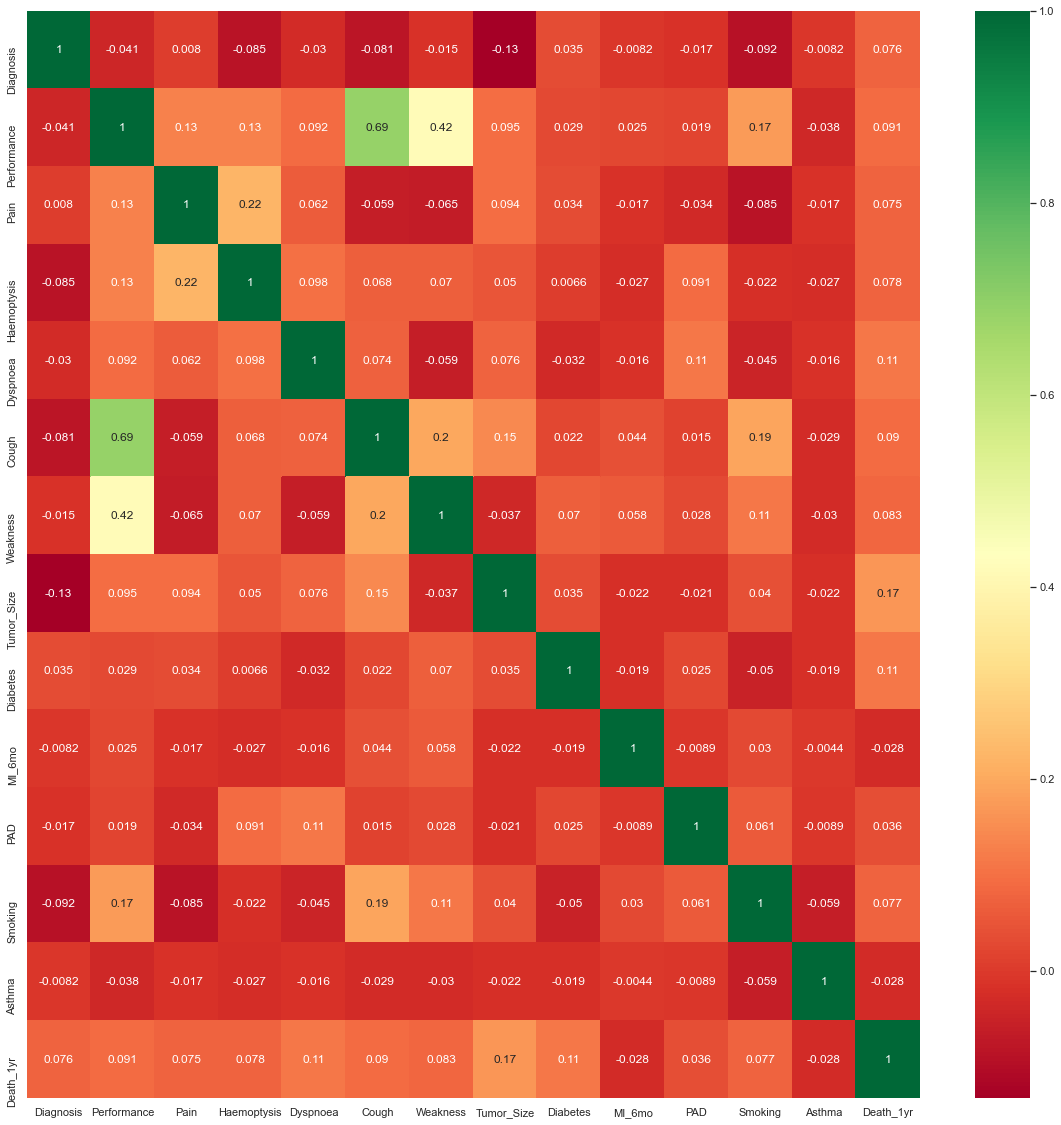

In [367]:
corr = surgery5.corr()
corr_features = corr.index
plt.figure(figsize=(20,20))

g=sns.heatmap(surgery5[corr_features].corr(), annot=True, cmap="RdYlGn")

<div class="alert alert-block alert-success">
<b><i>Korelacija reduciranih varijabli

In [368]:
surgery5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 469
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Diagnosis    453 non-null    float64 
 1   Performance  453 non-null    float64 
 2   Pain         453 non-null    float64 
 3   Haemoptysis  453 non-null    float64 
 4   Dyspnoea     453 non-null    float64 
 5   Cough        453 non-null    float64 
 6   Weakness     453 non-null    float64 
 7   Tumor_Size   453 non-null    float64 
 8   Diabetes     453 non-null    float64 
 9   MI_6mo       453 non-null    int64   
 10  PAD          453 non-null    float64 
 11  Smoking      453 non-null    float64 
 12  Asthma       453 non-null    float64 
 13  Death_1yr    453 non-null    float64 
 14  Age_g        453 non-null    category
 15  FVC_q        453 non-null    category
 16  FEV1_q       453 non-null    category
dtypes: category(3), float64(13), int64(1)
memory usage: 71.3 KB


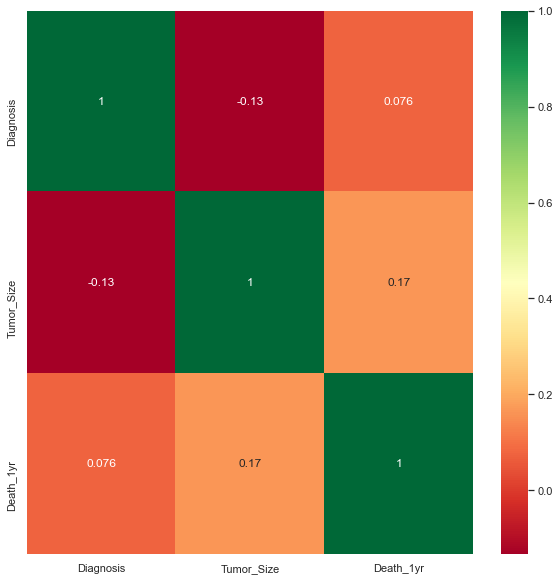

In [369]:
corr = surgery7.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))

g=sns.heatmap(surgery7[corr_features].corr(), annot=True, cmap="RdYlGn")

<div class="alert alert-block alert-success">
kreiranje dummy-a

In [370]:
surgery7 = pd.get_dummies(surgery7, drop_first = False, columns = ['Diagnosis', 'Tumor_Size', 'Age_g'])

In [371]:
surgery7.head()

,Death_1yr,Diagnosis_1.0,Diagnosis_2.0,Diagnosis_3.0,Diagnosis_4.0,Diagnosis_5.0,Diagnosis_6.0,Diagnosis_8.0,Tumor_Size_1.0,Tumor_Size_2.0,Tumor_Size_3.0,Tumor_Size_4.0,"Age_g_(30, 35]","Age_g_(35, 40]","Age_g_(40, 45]","Age_g_(45, 50]","Age_g_(50, 55]","Age_g_(55, 60]","Age_g_(60, 65]","Age_g_(65, 70]","Age_g_(70, 75]","Age_g_(75, 80]","Age_g_(80, 85]","Age_g_(85, 90]"
0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


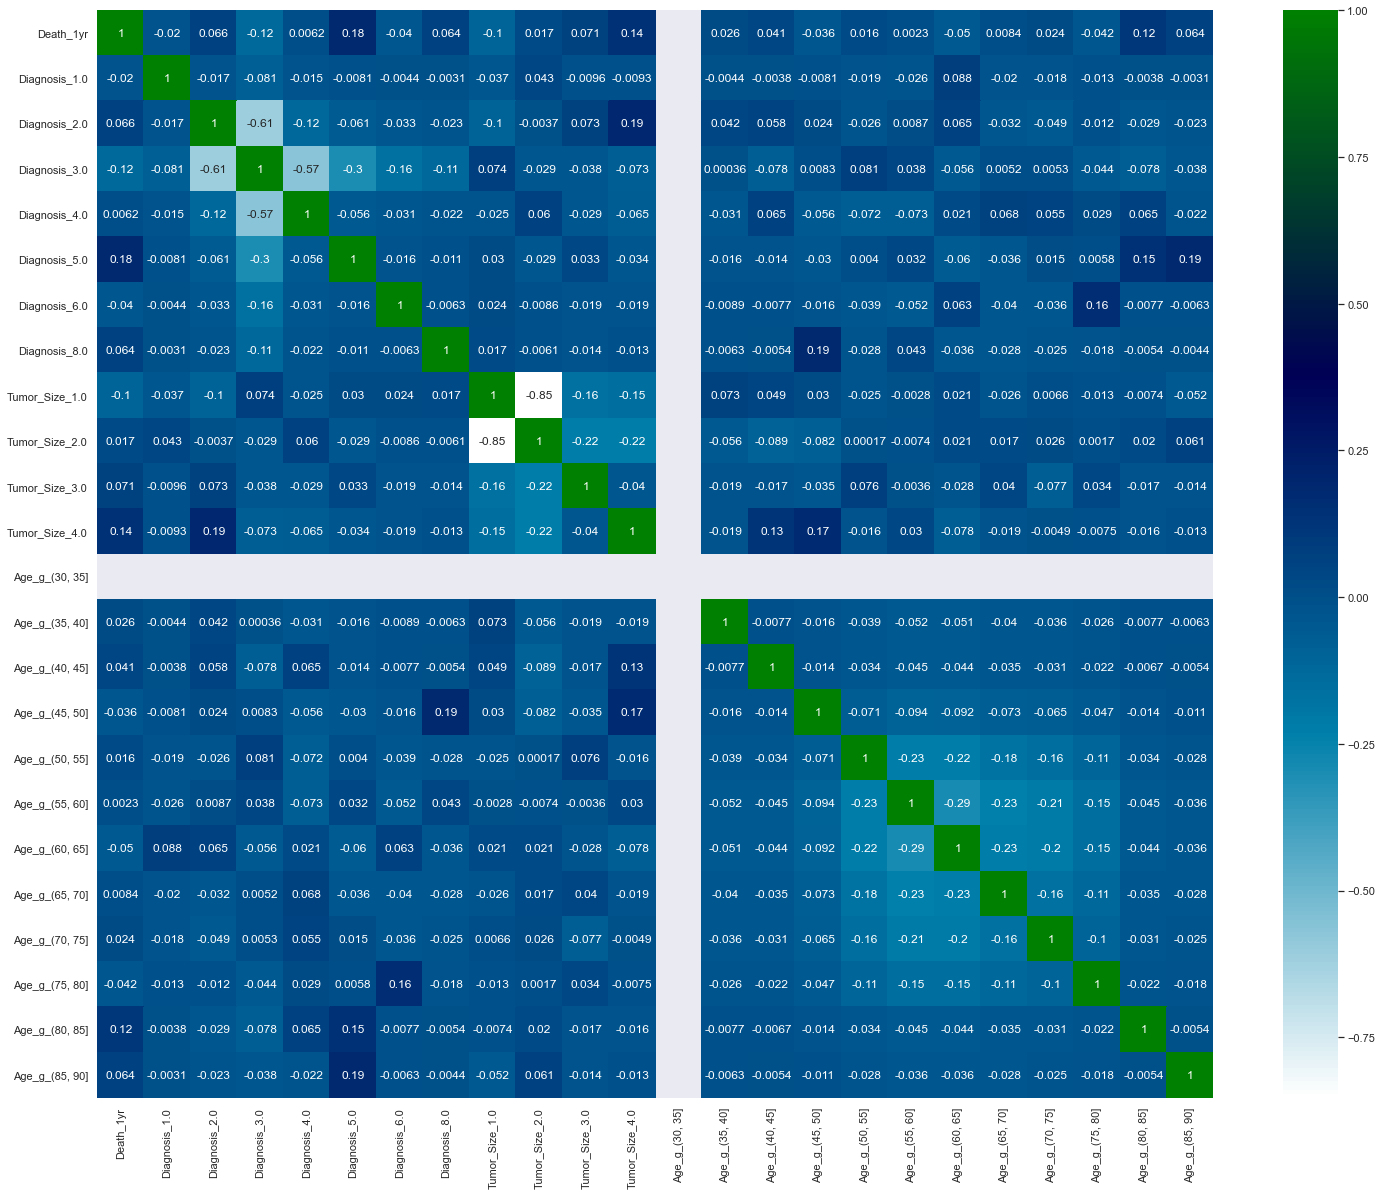

In [372]:
corrmat = surgery7.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,20))
#plot heat map
g=sns.heatmap(surgery7[top_corr_features].corr(),annot=True,cmap="ocean_r")

In [373]:
surgery7.drop(columns=['Diagnosis_2.0', 
                   'Diagnosis_3.0', 
                   'Diagnosis_4.0', 
                   'Tumor_Size_1.0', 
                   'Tumor_Size_2.0', 
                   'Age_g_(30, 35]', 
                   'Age_g_(55, 60]', 
                   'Age_g_(60, 65]'], axis=1, inplace=True)

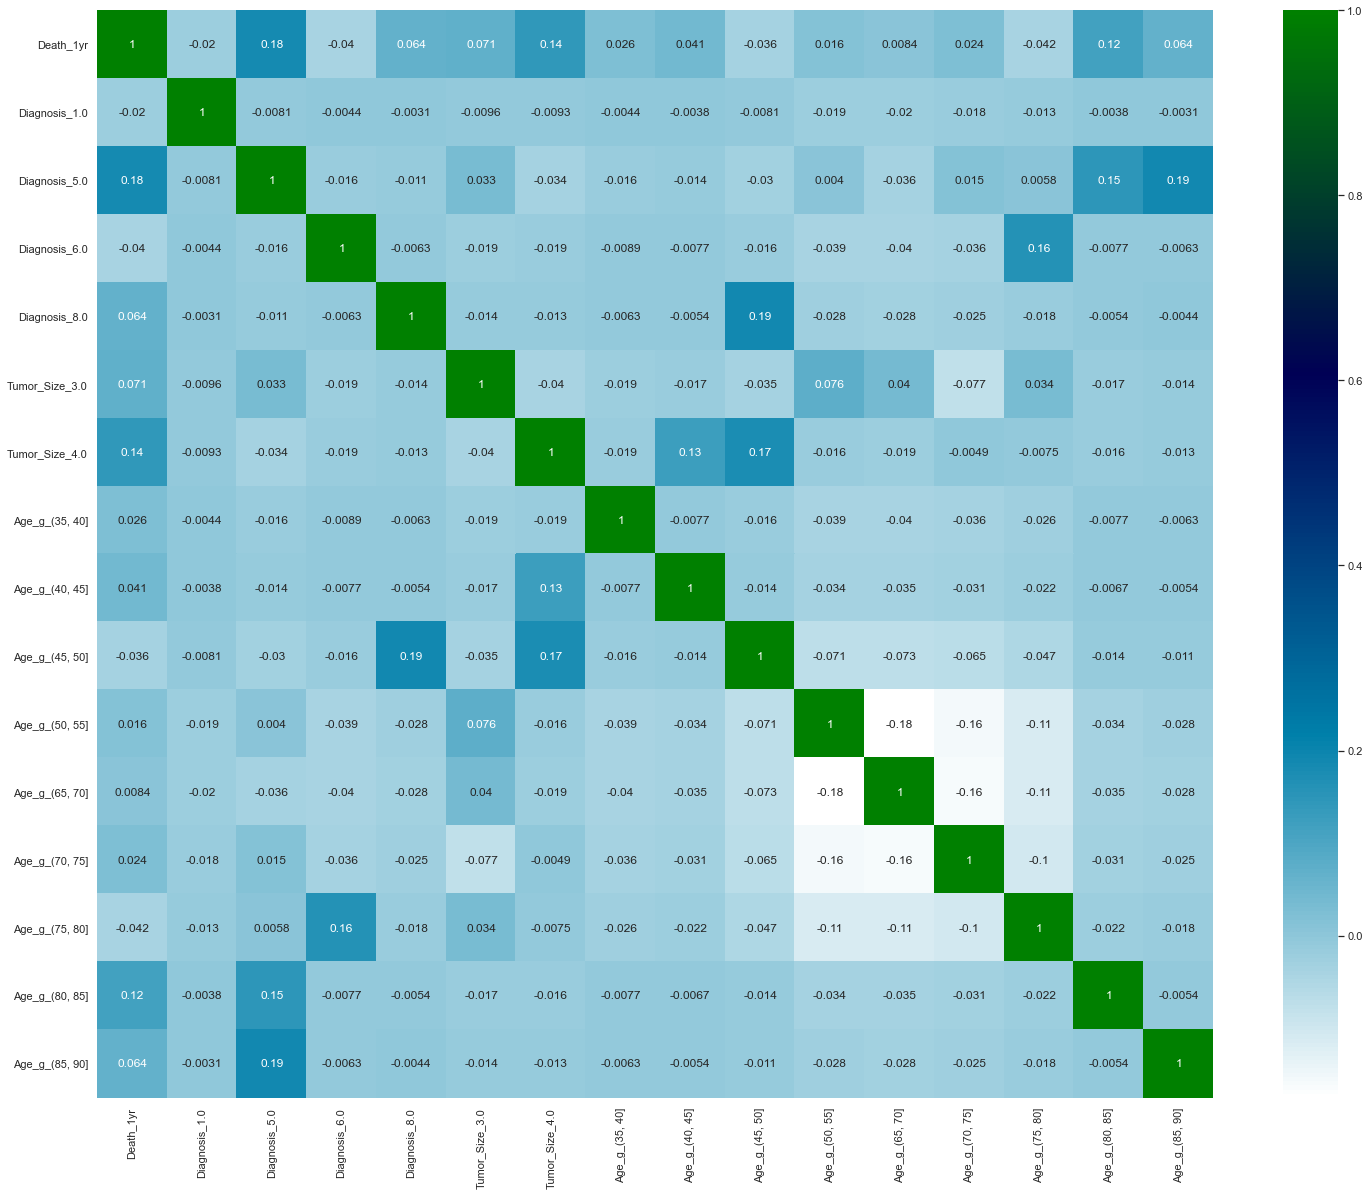

In [374]:
corrmat = surgery7.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,20))
#plot heat map
g=sns.heatmap(surgery7[top_corr_features].corr(),annot=True,cmap="ocean_r")

In [435]:
surgery_prep=surgery7.copy()

In [436]:
surgery_prep.to_csv('surgery_prep.csv', index=False)

<div class="alert alert-block alert-success">
<b><i>Logistic regression

In [375]:
surgery8=surgery7.copy()

In [376]:
X = surgery8.drop(columns='Death_1yr', axis=1)
y = surgery8['Death_1yr']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [378]:
model = LogisticRegression().fit(X_train, y_train)

In [379]:
predictions = model.predict(X_test)

In [380]:
print(confusion_matrix(y_test, predictions))

[[82  0]
 [ 9  0]]


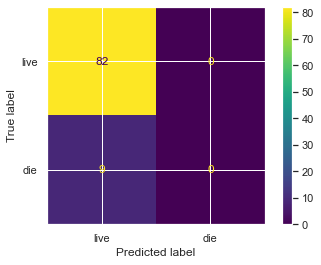

In [381]:
plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=['live', 'die'])

In [382]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        82
         1.0       0.00      0.00      0.00         9

    accuracy                           0.90        91
   macro avg       0.45      0.50      0.47        91
weighted avg       0.81      0.90      0.85        91



In [383]:
probs = model.predict_proba(X_test)

In [384]:
probability_df = pd.DataFrame({'actual':y_test,
                               'predicted':predictions,
                               'prob_live':probs[:, 0],
                               'prob_die':probs[:, 1]})
probability_df

,actual,predicted,prob_live,prob_die
366,0.0,0.0,0.864329,0.135671
40,1.0,0.0,0.674595,0.325405
375,0.0,0.0,0.824774,0.175226
372,0.0,0.0,0.904970,0.095030
161,0.0,0.0,0.864329,0.135671
...,...,...,...,...
465,0.0,0.0,0.790459,0.209541
144,0.0,0.0,0.830211,0.169789
97,0.0,0.0,0.902507,0.097493
58,0.0,0.0,0.864329,0.135671


In [385]:
auc = roc_auc_score(y_test, probs[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

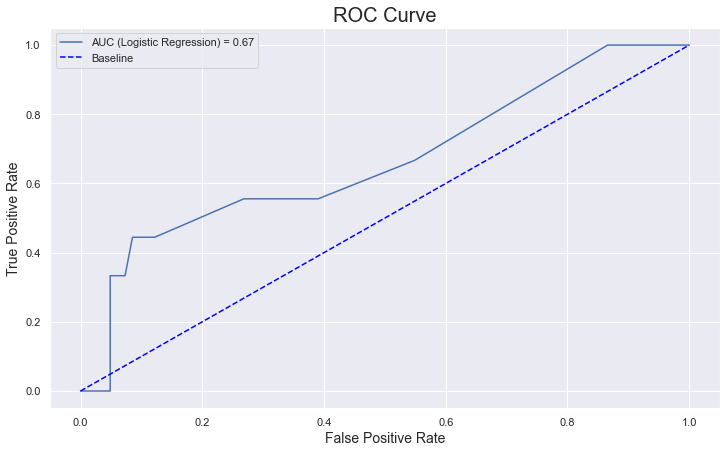

In [386]:
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (Logistic Regression) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
import itertools

In [388]:
X = surgery8.drop(['Death_1yr'], axis=1)
X2 = surgery8[['Diagnosis_5.0', 'Diagnosis_8.0', 'Tumor_Size_3.0', 'Tumor_Size_4.0', 'Age_g_(50, 55]', 'Age_g_(65, 70]','Age_g_(70, 75]']]
y = surgery8['Death_1yr']

In [389]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Ova funkcija prikazuje confusion matrix.
    Normalizacija se aplicira kao `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [390]:
def model_report(model, X, y, title, weight=None):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1111, stratify=y)
    
    clf = model(class_weight=weight, random_state=1111)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    class_names = ['Live', 'Death']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
      
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [391]:
def class_weights_plot(model, title):
    """ Prikazuje točnost, prosječnu preciznost i predviđa broj umrlih za X2."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    acc_scores = []
    prec_scores = []
    correct_deaths = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        acc_scores.append(accuracy_score(y, predicted))
        prec_scores.append(average_precision_score(y, predicted))
        correct_deaths.append(confusion_matrix(y, predicted)[1,1]/68)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, acc_scores, marker='.', label='Accuracy Score')
    plt.plot(class_weights, prec_scores, marker='.', label='Average Precision')
    plt.plot(class_weights, correct_deaths, marker='.', label='Correct Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

In [392]:
def class_weights_tf_plot(model, title):
    """Vrijednosti confusion matrix za X2."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    true_live = []
    false_live = []
    true_death = []
    false_death = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)
        
        true_live.append(confusion_matrix(y, predicted)[0,0]/385)
        false_live.append(confusion_matrix(y, predicted)[1,0]/68)
        true_death.append(confusion_matrix(y, predicted)[1,1]/68)
        false_death.append(confusion_matrix(y, predicted)[0,1]/385)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, true_live, marker='.', label='Correct Live Predictions')
    plt.plot(class_weights, false_live, marker='.', label='False Live Predictions')
    plt.plot(class_weights, true_death, marker='.', label='Correct Death Predictions')
    plt.plot(class_weights, false_death, marker='.', label='False Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92        77
       Death       0.00      0.00      0.00        14

    accuracy                           0.85        91
   macro avg       0.42      0.50      0.46        91
weighted avg       0.72      0.85      0.78        91

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


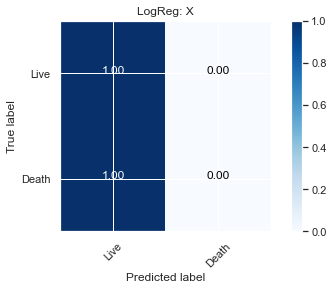

In [393]:
model_report(LogisticRegression, X, y,'LogReg: X')

Accuracy: 0.64
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.83      0.71      0.77        77
       Death       0.12      0.21      0.15        14

    accuracy                           0.64        91
   macro avg       0.48      0.46      0.46        91
weighted avg       0.72      0.64      0.67        91

Normalized confusion matrix
[[0.71 0.29]
 [0.79 0.21]]


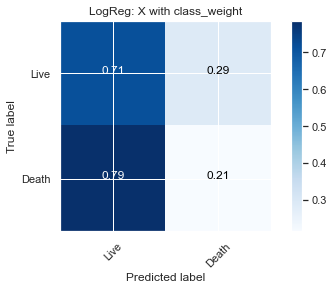

In [394]:
model_report(LogisticRegression, X, y,'LogReg: X with class_weight','balanced')

Accuracy: 0.67
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.75      0.79        77
       Death       0.14      0.21      0.17        14

    accuracy                           0.67        91
   macro avg       0.49      0.48      0.48        91
weighted avg       0.73      0.67      0.70        91

Normalized confusion matrix
[[0.75 0.25]
 [0.79 0.21]]


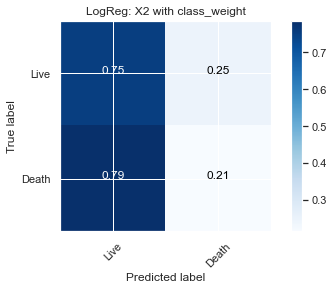

In [395]:
model_report(LogisticRegression, X2, y,'LogReg: X2 with class_weight','balanced')

<div class="alert alert-block alert-success">
Model pokazuje 15% smrti pacijenata u prvoj godini nakon operacije, odnosno model predviđa 85% preživjelih pacijenata u prvoj godini nakon operacije.

In [396]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = None

from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

<div class="alert alert-block alert-success">
<b><i>Logistic Regression

In [397]:
model_lr = LogisticRegression()
solvers_lr = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_lr = ['none', 'l1', 'l2', 'elasticnet']
c_values_lr = [100, 10, 1.0, 0.1, 0.01]

grid_lr = dict(solver=solvers_lr,penalty=penalty_lr,C=c_values_lr)
cv_lr = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_lr = GridSearchCV(estimator=model_lr, 
                           param_grid=grid_lr, 
                           n_jobs=-1, 
                           cv=cv_lr, 
                           scoring='roc_auc', 
                           error_score=0,
                           verbose=1)

grid_results_lr = grid_search_lr.fit(X_train, y_train)

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [398]:
lr_best_params = grid_results_lr.best_params_

In [399]:
log_reg = LogisticRegression(**lr_best_params)
log_reg.fit(X_train,y_train)

pred_lr = log_reg.predict(X_test)
report_lr = classification_report(y_test, pred_lr)

<div class="alert alert-block alert-success">
<b><i>DecisionTreeClassifier

In [400]:
model_dt = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = range(1, 20)
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

grid_dt = dict(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

cv_dt = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model_dt, 
                       param_grid=grid_dt, 
                       n_jobs=-1, 
                       cv=cv_dt, 
                       scoring='roc_auc',
                       error_score=0,
                       verbose=1)

grid_result_dt = grid_search_dt.fit(X_train, y_train)

Fitting 30 folds for each of 1368 candidates, totalling 41040 fits


In [401]:
dt_best_params = grid_result_dt.best_params_

In [402]:
dt = DecisionTreeClassifier(**dt_best_params)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

report_dt = classification_report(y_test, pred_dt)

<div class="alert alert-block alert-success">
<b><i>RandomForestClassifier

In [403]:
model_rf = RandomForestClassifier()
n_estimators_rf = [10, 100, 1000]
max_features_rf = ['sqrt', 'log2']

grid_rf = dict(n_estimators=n_estimators_rf, max_features=max_features_rf)
cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search_rf = GridSearchCV(estimator=model_rf, 
                              param_grid=grid_rf, 
                              n_jobs=-1, 
                              cv=cv_rf, 
                              scoring='roc_auc', 
                              error_score=0,
                              verbose=1)

grid_result_rf = grid_search_rf.fit(X_train, y_train)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


In [404]:
rf_best_params = grid_result_rf.best_params_

In [405]:
rf = RandomForestClassifier(**rf_best_params)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, pred_rf)

In [406]:
report_names = ['Logistic Regresion', 'Decision Tree', 'Random Forests']
models = [log_reg, dt, rf]

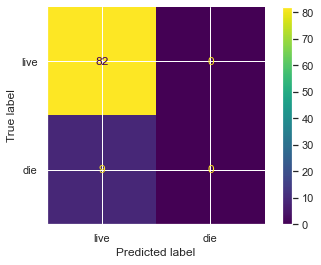

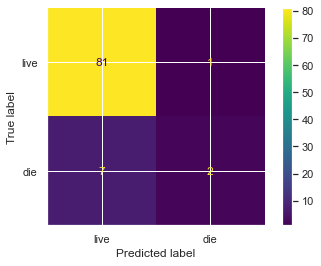

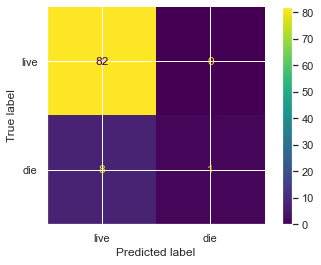

In [407]:
for model in models:
    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, display_labels=['live', 'die'])

In [408]:
reports = [report_lr, report_dt, report_rf]

for rn, r in zip(report_names, reports):
    print(rn)
    print('-----------------------------------------------------------')
    print(r)
    print('-----------------------------------------------------------')

Logistic Regresion
-----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        82
         1.0       0.00      0.00      0.00         9

    accuracy                           0.90        91
   macro avg       0.45      0.50      0.47        91
weighted avg       0.81      0.90      0.85        91

-----------------------------------------------------------
Decision Tree
-----------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        82
         1.0       0.67      0.22      0.33         9

    accuracy                           0.91        91
   macro avg       0.79      0.61      0.64        91
weighted avg       0.90      0.91      0.89        91

-----------------------------------------------------------
Random Forests
----------------------------------------------------------

In [409]:
probs_lr = log_reg.predict_proba(X_test)[:, 1]
probs_dt = dt.predict_proba(X_test)[:, 1]
probs_rf = rf.predict_proba(X_test)[:, 1]

In [410]:
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

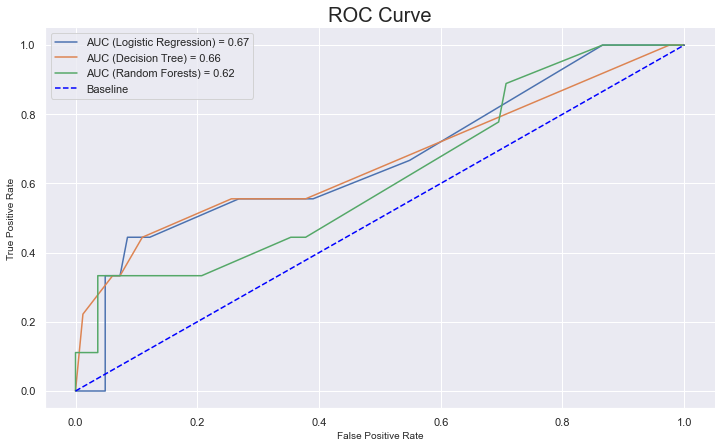

In [411]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
#plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=10)
plt.ylabel('True Positive Rate', size=10)
plt.legend();

<div class="alert alert-block alert-info">
<b><i>NaiveBayes

In [415]:
surgery9=surgery8.copy()

In [416]:
#odvajanje X i Y
X = surgery9.drop('Death_1yr',axis=1)
y = surgery9['Death_1yr']

In [417]:
#80:20
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 1,stratify=y)

In [418]:
model.score(X_train,y_train)

0.8646408839779005

In [419]:
# Predviđanje za test i trening
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [420]:
# Confusion Matrix za trening
print(confusion_matrix(pred_train,y_train))
print(classification_report(pred_train,y_train))

[[306  48]
 [  1   7]]
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93       354
         1.0       0.13      0.88      0.22         8

    accuracy                           0.86       362
   macro avg       0.56      0.87      0.57       362
weighted avg       0.98      0.86      0.91       362



<div class="alert alert-block alert-info">
<b><i> Population Stability index
    
    PSI mjeri koliko se populacija promijenila tijekom vremena ili između dva različita uzorka populacije. To čini tako što povezuje dvije distribucije i uspoređuje postotke stavki u svakom "bucketu", što rezultira jednim brojem koji se može koristiti za razumijevanje različitosti populacije. 
    
    Uobičajena tumačenja rezultata PSI su:
    • PSI <0,1: nema značajne promjene stanovništva 
    • PSI <0,2: umjerena promjena populacije 
    • PSI> = 0,2: značajna promjena stanovništva

In [421]:
import os
os.getcwd( )

'C:\\Users\\krist\\Untitled Folder'

In [422]:
#kreiranje slučajnih 1000 varijabli 
trained = np.random.rand(1000)
new = np.random.rand(1000)

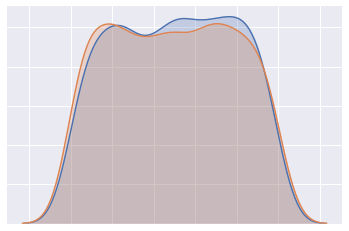

In [434]:
#Prikaz 
sns.set_style("darkgrid")
plot = sns.kdeplot(trained, shade=True)
plot = sns.kdeplot(new, shade=True)
plot.set(yticklabels=[], xticklabels = [])
sns.despine(left=True)

In [424]:
#Binning Formula
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

#Kreiranje Breakpoint-a
buckets = 10
raw_breakpoints = np.arange(0, buckets + 1) / (buckets) * 100
breakpoints = scale_range(raw_breakpoints, np.min(trained), np.max(trained))

In [425]:
print(raw_breakpoints)

[3.82e-05 1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01
 8.00e-01 9.00e-01 1.00e+00]


In [426]:
print(breakpoints)

[3.82e-05 1.00e-01 2.00e-01 3.00e-01 4.00e-01 5.00e-01 6.00e-01 7.00e-01
 8.00e-01 9.00e-01 1.00e+00]


In [427]:
#distribucija vrijednosti breakpoint-a
initial_counts = np.histogram(trained, breakpoints)[0]
new_counts = np.histogram(new, breakpoints)[0]

In [428]:
#Kreiranje okvira podataka
surgery9 = pd.DataFrame({'Bucket': np.arange(1, 11), 'Breakpoint Value':breakpoints[1:],
                   'trained Count':initial_counts, 'New Count':new_counts})
    
surgery9['trained Percent'] = surgery9['trained Count'] / len(trained)
surgery9['New Percent'] = surgery9['New Count'] / len(new)
surgery9

,Bucket,Breakpoint Value,trained Count,New Count,trained Percent,New Percent
0,1,0.100017,89,122,0.089,0.122
1,2,0.199995,99,88,0.099,0.088
2,3,0.299973,112,101,0.112,0.101
3,4,0.399952,89,97,0.089,0.097
4,5,0.499930,106,104,0.106,0.104
5,6,0.599908,108,87,0.108,0.087
6,7,0.699887,101,108,0.101,0.108
7,8,0.799865,103,100,0.103,0.100
8,9,0.899843,104,96,0.104,0.096
9,10,0.999822,89,97,0.089,0.097


In [429]:
surgery9['PSI'] = (surgery9['New Percent'] - surgery9['trained Percent']) * np.log(surgery9['New Percent'] / surgery9['trained Percent'])

np.sum(surgery9['PSI'])

0.019994538014486536

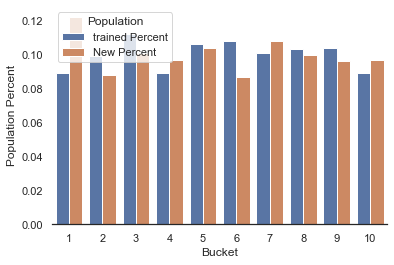

In [430]:
#Usporedba postotaka u bucket-ima
percents = surgery9[['trained Percent', 'New Percent', 'Bucket']] \
             .melt(id_vars=['Bucket']) \
             .rename(columns={'variable':'Population', 'value':'Percent'})
             
    
percents.head()


p = sns.barplot(x="Bucket", y="Percent", hue="Population", data=percents)
p.set(xlabel='Bucket', ylabel='Population Percent')
sns.despine(left=True)

<div class="alert alert-block alert-info"> PSI je < 0,1: nema značajne promjene 